### Week 1 Code Review

In [3]:
# import sys
# !{sys.executable} -m pip install wfdb
# !{sys.executable} -m pip install .

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

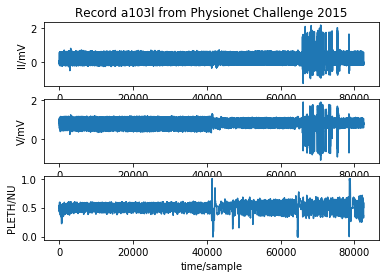

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [6]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)


# Can also read the same files hosted on Physiobank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = https://physionet.org/physiobank/database/challenge/2015/training/
record2 = wfdb.rdrecord('a103l', pb_dir='challenge/2015/training/')

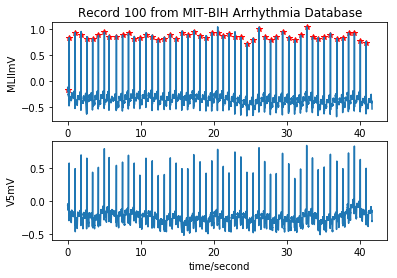

In [7]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('sample-data/100', sampto = 15000)
annotation = wfdb.rdann('sample-data/100', 'atr', sampto = 15000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

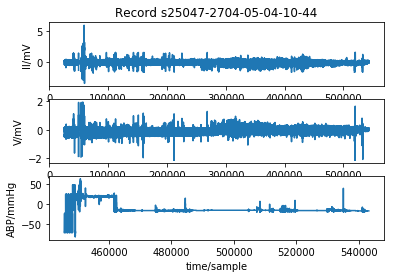

{'record_name': 's25047-2704-05-04-10-44',
 'n_sig': 3,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 543240,
 'base_time': datetime.time(10, 44, 18, 529000),
 'base_date': datetime.date(2704, 5, 4),
 'comments': ['<age>: ?? <sex>: ?'],
 'sig_name': ['II', 'V', 'ABP'],
 'p_signal': array([[         nan,          nan,          nan],
        [         nan,          nan,          nan],
        [         nan,          nan,          nan],
        ...,
        [ -0.02469136,   0.        , -17.6       ],
        [  0.04938272,   0.03333333, -17.6       ],
        [  0.02469136,   0.        , -17.6       ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': None,
 'fmt': ['80', '80', '80'],
 'samps_per_frame': None,
 'skew': None,
 'byte_offset': None,
 'adc_gain': None,
 'baseline': None,
 'units': ['mV', 'mV', 'mmHg'],
 'adc_res': None,
 'adc_zero': None,
 'init_value': None,
 'checksum': None,
 'block_size': None,
 'layout': 'variable',
 'si

In [7]:
# Demo 6 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 
record = wfdb.rdrecord('sample-data/multi-segment/s25047/s25047-2704-05-04-10-44')
wfdb.plot_wfdb(record=record, title='Record s25047-2704-05-04-10-44') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank (takes long to stream the many large files)
#record2 = wfdb.rdsamp('s25047-2704-05-04-10-44', pbdir = 'mimic2wdb/matched/s25047')

In [6]:
## Demo 7 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot
record = wfdb.rdrecord('sample-data/multi-segment/s00001/s00001-2896-10-10-00-31',
                       sampfrom=3000000, sampto=4000000)
wfdb.plot_wfdb(record, title='Record s00005/s00001-2896-10-10-00-31') 
display(record.__dict__)

# Can also read the same files hosted on PhysioBank
record2 = wfdb.rdrecord('s00001-2896-10-10-00-31', sampfrom=3000000, sampto=4000000,
                        pb_dir = 'mimic2wdb/matched/s00001')

TypeError: sequence item 1: expected str instance, NoneType found